# Guided Project - Predicting Bike Rentals
## Project Introduction
In this project we will try to predict the total number of bikes people rented in a given hour. We will predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, we will create a few different machine learning models and evaluate their performance.
## Data Documentation
You can find the dataset [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) and below is the relevant columns description:
- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

## Import Data, Libraries & EDA

In [29]:
# import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import data
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This looks pretty clean with no missing values. Now we are going to look into distributions and unique values.

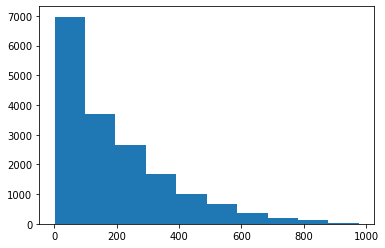

In [6]:
# distributions
plt.hist(bike_rentals['cnt'])
plt.show()

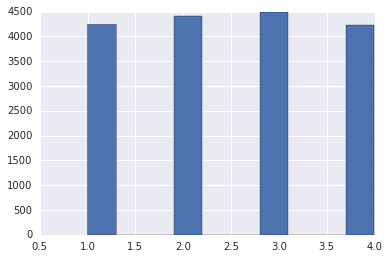

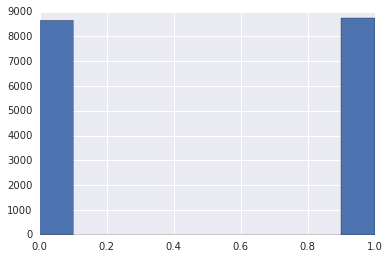

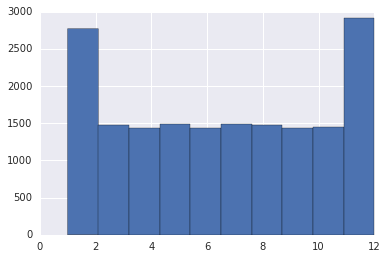

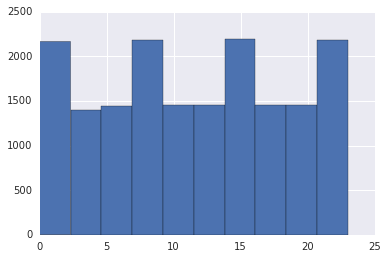

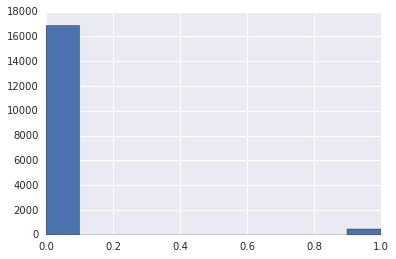

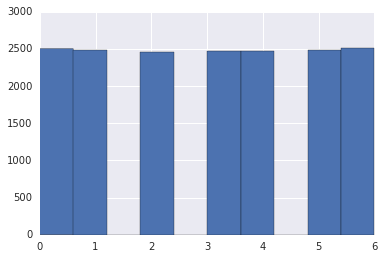

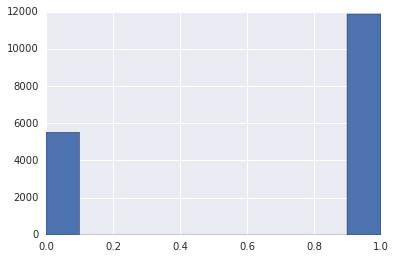

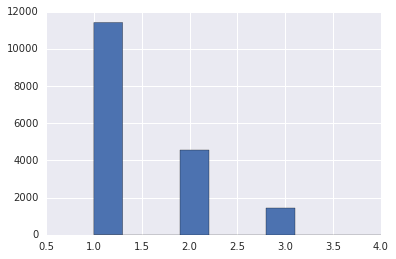

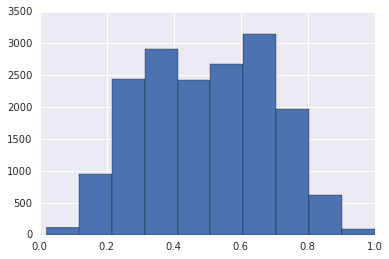

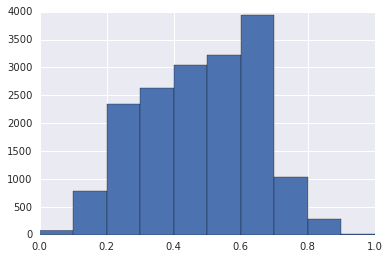

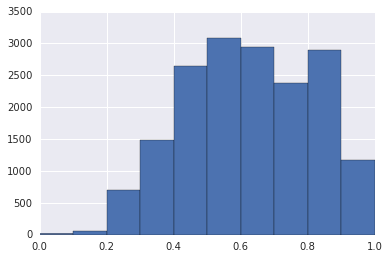

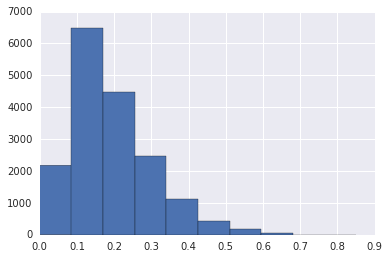

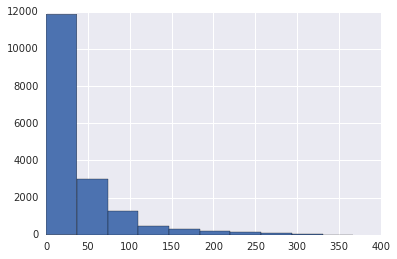

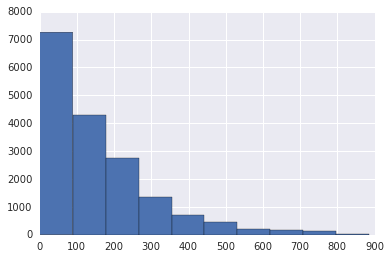

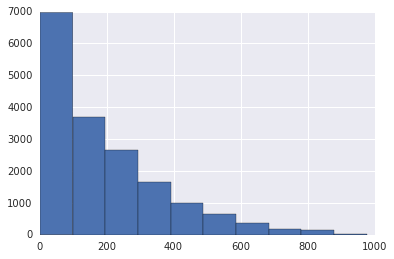

In [22]:
# distributions
numeric = bike_rentals.select_dtypes(include=['int','float'])
numeric_cols = numeric.columns
for c in numeric_cols[1:]:
    plt.hist(bike_rentals[c])
    plt.show()

In [8]:
# distributions
# numeric = bike_rentals.select_dtypes(include=['int','float'])
# numeric_cols = numeric.columns
# for c in numeric_cols[1:]:
#     sns.displot(x=bike_rentals[c])
#     plt.show()

In [9]:
# correlations
print('Correlations with cnt:')
print(bike_rentals.corr()['cnt'].sort_values(ascending=False).drop('cnt').round(2))
print('Abs Correlations with cnt (sorted)')
print(bike_rentals.corr().abs()['cnt'].sort_values(ascending=False).drop('cnt').round(2))

Correlations with cnt:
registered    0.97
casual        0.69
temp          0.40
atemp         0.40
hr            0.39
instant       0.28
yr            0.25
season        0.18
mnth          0.12
windspeed     0.09
workingday    0.03
weekday       0.03
holiday      -0.03
weathersit   -0.14
hum          -0.32
Name: cnt, dtype: float64
Abs Correlations with cnt (sorted)
registered    0.97
casual        0.69
temp          0.40
atemp         0.40
hr            0.39
hum           0.32
instant       0.28
yr            0.25
season        0.18
weathersit    0.14
mnth          0.12
windspeed     0.09
holiday       0.03
workingday    0.03
weekday       0.03
Name: cnt, dtype: float64


## Data Cleaning & Feature Engineering

In [10]:
# create a function to label the hour of the day in different 4 6-hour wide bins
def assign_label(hr):
    if hr >= 0 and hr < 6:
        return 4
    elif hr >= 6 and hr < 12:
        return 1
    elif hr >= 12 and hr < 18:
        return 2
    elif hr >= 18 and hr < 24:
        return 3

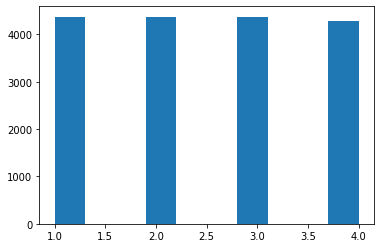

In [11]:
# apply above function to 'hr' column
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
plt.hist(bike_rentals['time_label'])
plt.show()

In [13]:
# sns.displot(bike_rentals['time_label'])
# plt.show()

## Train & Test
Now that we have the additional feature we can split the DataFrame into a train and test before applying our ML models.
We are going to select a random 80% sample of the DataFrame as train and the rest as test
### Error Metric
We are going to use MSE and RMSE as our error metric.

In [28]:
# train_cutoff = round(len(bike_rentals)*0.8)
# print(train_cutoff)
# print(len(bike_rentals))
# print(bike_rentals.shape)
# print(bike_rentals.shape[0])

In [24]:
# get train as random sample
train = bike_rentals.sample(frac=0.8).copy()

In [25]:
# get test as remaining rows compared to train
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [27]:
# print(len(train))
# print(len(test))
# print(len(test) + len(train))
# print(len(bike_rentals))

In [20]:
features = list(bike_rentals.columns)
# remove the target
features.remove('cnt')
target = 'cnt'
# remove columns that tell if there is a rental
features.remove('casual')
features.remove('registered')
features.remove('dteday')
print(features)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']


### Linear Model

In [30]:
# initiate model
lr = LinearRegression()
# fit model
lr.fit(train[features], train[target])
# predict model
lr_predictions = lr.predict(test[features])
# calculate MSE and RMSE
lr_mse = mean_squared_error(test[target], lr_predictions)
lr_rmse = np.sqrt(lr_mse)
print('LR MSE:', lr_mse)
print('LR RMSE:', lr_rmse)

LR MSE: 18501.256542949515
LR RMSE: 136.01932415267146


### Decision Tree Model

In [31]:
# initiate Decision Tree model
# we are going to try different parameters in this section
dt = DecisionTreeRegressor(min_samples_leaf=5, max_depth=10, min_samples_split=2)
# fit model
dt.fit(train[features], train[target])
# make predictions
dt_predictions = dt.predict(test[features])
# calculate MSE and RMSE
dt_mse = mean_squared_error(test[target], dt_predictions)
dt_rmse = np.sqrt(dt_mse)
print('DT MSE:', dt_mse)
print('DT RMSE:', dt_rmse)

DT MSE: 3111.580727166289
DT RMSE: 55.78154468250489


In [38]:
# initiate Decision Tree model
# we are going to try different parameters in this section
dt = DecisionTreeRegressor(min_samples_leaf=5, max_depth=5, min_samples_split=2)
# fit model
dt.fit(train[features], train[target])
# make predictions
dt_predictions = dt.predict(test[features])
# calculate MSE and RMSE
dt_mse = mean_squared_error(test[target], dt_predictions)
dt_rmse = np.sqrt(dt_mse)
print('DT MSE:', dt_mse)
print('DT RMSE:', dt_rmse)

DT MSE: 3111.5716607499844
DT RMSE: 55.78146341527788


Looks like max_depth is the parameter driving most changes in the model accuracy, so we are going to loop through a list of values for this parameter and display how the accuracy changes.

In [43]:
dt_max_depth_rmse_values = {}
mse_dt_values = []
rmse_dt_values = []
for i in range(1,101):
    dt = DecisionTreeRegressor(min_samples_leaf=5, max_depth=i)
    dt.fit(train[features], train[target])
    dt_predictions = dt.predict(test[features])
    dt_mse = mean_squared_error(test[target], dt_predictions)
    dt_rmse = np.sqrt(dt_mse)
    mse_dt_values.append(dt_mse)
    rmse_dt_values.append(dt_rmse)
    dt_max_depth_rmse_values[i] = dt_rmse

In [49]:
# plot the values in a scatter plot
dt_rmse_values = pd.DataFrame.from_dict(dt_max_depth_rmse_values,orient='index', columns=['RMSE'])

In [51]:
dt_rmse_values

,RMSE
1,155.459110
2,140.352663
3,129.009062
4,119.408716
5,110.804611
...,...
96,50.817644
97,50.728377
98,50.696619
99,50.676494


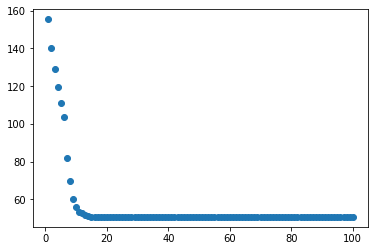

In [50]:
plt.scatter(x=dt_rmse_values.index, y=dt_rmse_values['RMSE'])
plt.show()

The accuracy of the model plateus as ~50 RMSE after getting to 15 nodes.

### Random Forest Model

In [62]:
# initiate random forest regressor
rf = RandomForestRegressor()
# fit model
rf.fit(train[features], train[target])
# predict with model
rf_predictions = rf.predict(test[features])
# calculate MSE and RMSE
rf_mse = mean_squared_error(test[target], rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print('RF MSE:', rf_mse)
print('RF RMSE:', rf_rmse)

RF MSE: 1609.8519475834291
RF RMSE: 40.1229603541841


A standard Random Forest model greatly increases the accuracy. Let's take a look at the estimators and other parameters and how we can tweak.

In [73]:
rf_max_depth_rmse_values = {}
for i in range(1,201,10):
    rf = RandomForestRegressor(n_estimators=i,min_samples_leaf=5)
    rf.fit(train[features], train[target])
    rf_predictions = rf.predict(test[features])
    rf_mse = mean_squared_error(test[target], rf_predictions)
    rf_rmse = np.sqrt(rf_mse)
    rf_max_depth_rmse_values[i] = rf_rmse

In [74]:
# plot the values in a scatter plot
rf_rmse_values = pd.DataFrame.from_dict(rf_max_depth_rmse_values,orient='index', columns=['RMSE'])

In [75]:
rf_rmse_values

,RMSE
1,54.417378
11,43.628549
21,42.696165
31,42.127852
41,42.952014
51,42.012128
61,42.219153
71,42.308537
81,42.336621
91,42.095177


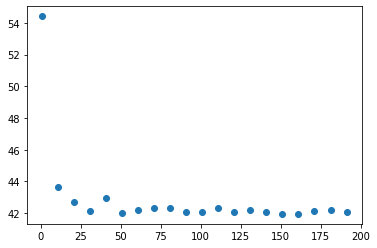

In [76]:
plt.scatter(x=rf_rmse_values.index, y=rf_rmse_values['RMSE'])
plt.show()

After reaching ~30 estimators the model accuracy stays constant around RMSE 40.

### Check overfitting
We are going to test the most efficient Decision Tree and Random Forest models for overfitting.

**Decision Tree**

In [77]:
# check Decision Tree overfitting based on the parameters that give us the best results using less resources
dt = DecisionTreeRegressor(min_samples_leaf=5, max_depth=15)
dt.fit(train[features], train[target])
dt_pred_train = dt.predict(train[features])
dt_train_mse = mean_squared_error(train[target], dt_pred_train)
dt_train_rmse = np.sqrt(dt_train_mse)
print(dt_train_rmse)
print(dt_rmse)

33.89804694990605
50.79312254901373


**Random Forest**

In [78]:
# check Random Forest with 30 estimators
rf = RandomForestRegressor(n_estimators=30, min_samples_leaf=5)
rf.fit(train[features], train[target])
rf_pred_train = rf.predict(train[features])
rf_train_mse = mean_squared_error(train[target], rf_pred_train)
rf_train_rmse = np.sqrt(rf_train_mse)
print(rf_train_rmse)
print(rf_rmse)

31.99062117312012
42.090937477820255


Using a Random Forest reduces the level of overfitting compared to a DecisionTree.

## Next Steps
This project was pretty straightforward with very clean data, limited cleaning and feature engineering.
For next steps we should:
- Calculate additional features like a weather index combining temperature, humidity, wind speed - some ideas can be a [Heat Index](https://en.wikipedia.org/wiki/Heat_index)
- Predict casual and interested rentals instead of total count 'cnt'